In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd

from src.data.datasets import SiteDataset, FloorDataset, TraceData

sns.set_style("whitegrid")
sns.set_context("notebook");

# Exploratory notebook

## A single trace file
Train model for each site? With floor as latent variables, uniform?, 
    for each floor, draw wifi locations


In [2]:
site_data = SiteDataset("5a0546857ecc773753327266")

In [3]:
site_id = "5a0546857ecc773753327266"
floor_id = "B1"
trace_id = "5e15bf91f4c3420006d52341"


In [4]:
trace_data = TraceData(site_id, floor_id, trace_id)

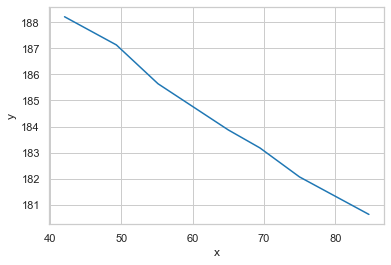

In [5]:
sns.lineplot(data=trace_data.data["TYPE_WAYPOINT"], x="x", y="y", sort=False);

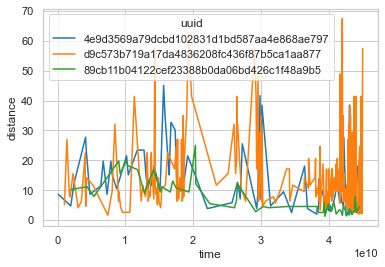

In [6]:
sns.lineplot(data=trace_data.data["TYPE_BEACON"], x="time", y="distance", hue="uuid");

<AxesSubplot:xlabel='time'>

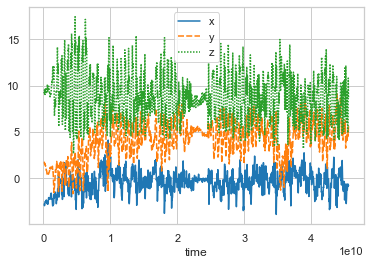

In [7]:
sns.lineplot(data=trace_data.data["TYPE_ACCELEROMETER"][["x", "y", "z"]])

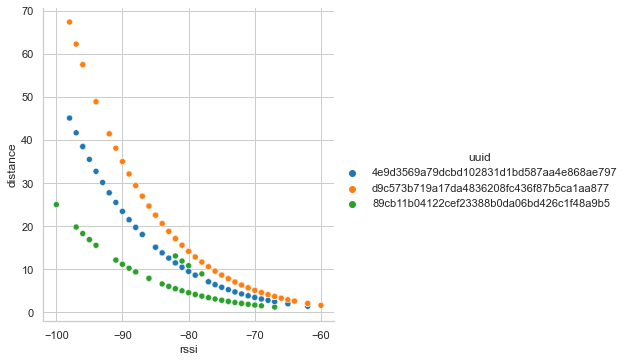

In [8]:
sns.relplot(data=trace_data.data["TYPE_BEACON"], x="rssi", y="distance", hue="uuid")

<AxesSubplot:xlabel='time'>

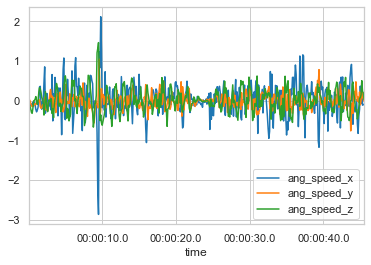

In [9]:
trace_data.data["TYPE_GYROSCOPE"][["ang_speed_x", "ang_speed_y", "ang_speed_z"]]\
        .resample(pd.Timedelta(seconds=0.1)).mean().plot()

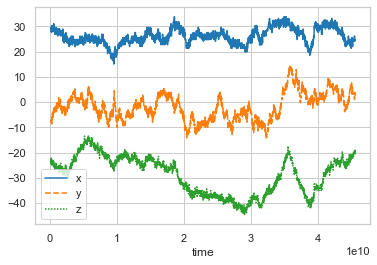

In [10]:
sns.lineplot(data=trace_data.data["TYPE_MAGNETIC_FIELD"][["x", "y", "z"]]);

<AxesSubplot:xlabel='time', ylabel='rssi'>

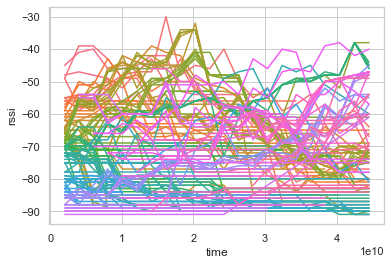

In [11]:
sns.lineplot(
    data=trace_data.data["TYPE_WIFI"], x="time", y="rssi", hue="bssid", legend=None
)


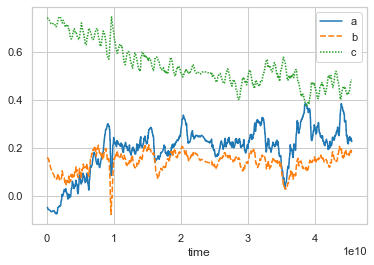

In [12]:
sns.lineplot(data=trace_data.data["TYPE_ROTATION_VECTOR"][["a", "b", "c"]]);

## All traces from a floor

A bit memory intensive (probably)

In [13]:
floor_data = FloorDataset(site_id, floor_id)
traces = floor_data.traces.values()

In [14]:
combined_waypoints = pd.concat(
    [t_data.data["TYPE_WAYPOINT"] for t_data in traces],
    keys = [t_data.trace_id for t_data in traces],
    names=["trace_id"]
)


<AxesSubplot:xlabel='x', ylabel='y'>

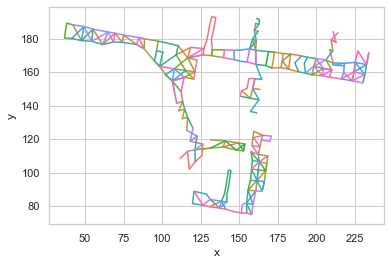

In [15]:
sns.lineplot(data=combined_waypoints, x="x", y="y", sort=False, hue="trace_id", legend=False)